# Part 3: Joining Data
---

In [142]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
sns.set_theme(palette='colorblind')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.
___

### Joining Tables

In [129]:
# load the bike stations and yelp poi dataframes
bike_stations = pd.read_csv('../data/bike_stations_hamilton.csv', index_col=0)
yelp_poi = pd.read_csv('../data/bike_stations_hamilton_poi_yelp.csv', index_col=0)

# Rename bike_stations id column to match yelp_poi so they can be merged
bike_stations = bike_stations.rename(columns={'id': 'station_id'})

In [130]:
# Checking the number of rows of each df
print(bike_stations.shape)
print(yelp_poi.shape)

(145, 6)
(2768, 8)


In [6]:
# Join both dataframes based on the station_id
full_df = pd.merge(bike_stations, yelp_poi, how='outer', on='station_id')

full_df = full_df.rename(columns={'name_x': 'station_name', 'name_y': 'poi_name'})

full_df.head()

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
0,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,vqyK2q3zJ74TIT1-7Bf3Tg,La Luna,65.0,4.0,$$,108.424550,"['306 King Street W', 'Hamilton, ON L8P 1B1', ..."
1,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,bHecMQ85o3ayw1t9hRA90g,The French,98.0,4.0,$$$,814.105154,"['37 King William Street', 'Hamilton, ON L8R 1..."
2,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,Q4oLgsU62VPR28pBm0vCXw,Earth To Table : Bread Bar,293.0,4.0,$$,1052.141521,"['258 Locke Street S', 'Hamilton, ON L8P 4B9',..."
3,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,9oIPWjU3DvtSdORv6I2toQ,The Ship,209.0,4.0,$$,970.855528,"['23 Augusta Street', 'Hamilton, ON L8N 1P6', ..."
4,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,752Fv2jKafftvoS3Twkqyg,Hambrgr,202.0,4.0,$$,858.672096,"['49 King William Street', 'Hamilton, ON L8R 1..."


In [7]:
# Checking if the merge worked correctly
print('Diff of number of bike stations:', bike_stations.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

Diff of number of bike stations: 0
Diff of number of POI: -2


As seen above, there are two extra rows on the dataframe after the merge when comparing the rows of yelp_poi dataframe. Further investigation is needed to identify the reason.

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   2770 non-null   int64  
 1   free_bikes    2770 non-null   int64  
 2   station_id    2770 non-null   object 
 3   latitude      2770 non-null   float64
 4   longitude     2770 non-null   float64
 5   station_name  2770 non-null   object 
 6   poi_id        2768 non-null   object 
 7   poi_name      2768 non-null   object 
 8   review_count  2768 non-null   float64
 9   rating        2768 non-null   float64
 10  price         1700 non-null   object 
 11  distance      2768 non-null   float64
 12  full_address  2768 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 281.5+ KB


In [9]:
# Identify the points of interest that are null
full_df[full_df['poi_id'].isnull()]

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
560,8,3,4f4fb284d16149957dda0b5ea3fb8a61,43.246080,-79.908238,Chedoke Stairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,8,4,8601b4c3dfc470daf8d5e63b28b20e7f,43.272991,-79.894527,Princess Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**It is concluded that the two new rows on full_df are for two bike stations without any point of interest (bars or restaurants) in a 1000-meter radius.**

In [42]:
#save data
full_df.to_csv('../data/bike_stations_hamilton_full_poi.csv')

### Exploratory Data Analysis (EDA)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.
___

#### Exploring the Dataset

In [10]:
full_df.head()

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
0,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,vqyK2q3zJ74TIT1-7Bf3Tg,La Luna,65.0,4.0,$$,108.424550,"['306 King Street W', 'Hamilton, ON L8P 1B1', ..."
1,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,bHecMQ85o3ayw1t9hRA90g,The French,98.0,4.0,$$$,814.105154,"['37 King William Street', 'Hamilton, ON L8R 1..."
2,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,Q4oLgsU62VPR28pBm0vCXw,Earth To Table : Bread Bar,293.0,4.0,$$,1052.141521,"['258 Locke Street S', 'Hamilton, ON L8P 4B9',..."
3,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,9oIPWjU3DvtSdORv6I2toQ,The Ship,209.0,4.0,$$,970.855528,"['23 Augusta Street', 'Hamilton, ON L8N 1P6', ..."
4,9,3,45dbb0009135e465f49f054517cbe74d,43.259126,-79.877212,Hess at king,752Fv2jKafftvoS3Twkqyg,Hambrgr,202.0,4.0,$$,858.672096,"['49 King William Street', 'Hamilton, ON L8R 1..."


In [11]:
full_df.shape

(2770, 13)

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   2770 non-null   int64  
 1   free_bikes    2770 non-null   int64  
 2   station_id    2770 non-null   object 
 3   latitude      2770 non-null   float64
 4   longitude     2770 non-null   float64
 5   station_name  2770 non-null   object 
 6   poi_id        2768 non-null   object 
 7   poi_name      2768 non-null   object 
 8   review_count  2768 non-null   float64
 9   rating        2768 non-null   float64
 10  price         1700 non-null   object 
 11  distance      2768 non-null   float64
 12  full_address  2768 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 281.5+ KB


**Decided to format price from string to category so it can be included in the analysis** 

In [13]:
# Counts number of null in the price column
(full_df['price'].isnull()).sum()

1070

In [14]:
# Check the counts of each price category
full_df['price'].value_counts()

price
$$      1011
$        510
$$$      176
$$$$       3
Name: count, dtype: int64

In [15]:
# Fill all null values with a str category
full_df['price'] = full_df['price'].fillna('#')

# Convert the str category to number category
full_df['price'] = full_df['price'].astype('category').cat.codes

In [16]:
# Check the counts of each price category
full_df['price'].value_counts()

price
0    1070
2    1011
1     510
3     176
4       3
Name: count, dtype: int64

Price category description

- Category 0 = Not listed

- Category 1 = $

- Category 2 = \$$

- Category 3 = $$$

- Category 4 = \$$\$$

In [17]:
full_df.describe()

,empty_slots,free_bikes,latitude,longitude,review_count,rating,price,distance
count,2770.000000,2770.000000,2770.000000,2770.000000,2768.000000,2768.000000,2770.000000,2768.000000
mean,6.968953,5.048014,43.256934,-79.875936,37.039740,3.935874,1.109025,615.884264
std,5.339514,3.605832,0.006539,0.031494,50.921468,0.803603,1.001817,326.751397
min,0.000000,0.000000,43.242163,-79.953754,1.000000,1.000000,0.000000,6.905015
25%,4.000000,3.000000,43.251990,-79.899309,6.000000,3.500000,0.000000,349.087847
50%,6.000000,4.000000,43.256556,-79.869577,19.000000,4.000000,1.000000,613.328974
75%,8.000000,6.000000,43.261886,-79.855098,42.000000,4.500000,2.000000,889.170739
max,32.000000,22.000000,43.289479,-79.766388,293.000000,5.000000,4.000000,1394.111450


In [18]:
# Investigating the rating percentage from 1 to 5
full_df['rating'].value_counts() / len(full_df['rating'])

rating
4.0    0.376173
4.5    0.228881
5.0    0.122744
3.5    0.115884
2.5    0.063538
3.0    0.055235
1.0    0.017329
2.0    0.015884
1.5    0.003610
Name: count, dtype: float64

In [19]:
# Investigating the review_count percentage
full_df['review_count'].value_counts() / len(full_df['review_count'])

review_count
1.0     0.098195
7.0     0.046209
3.0     0.043321
2.0     0.041877
5.0     0.034657
          ...   
61.0    0.001083
39.0    0.001083
47.0    0.000361
30.0    0.000361
67.0    0.000361
Name: count, Length: 67, dtype: float64

In [20]:
# Investigating the price category percentage
full_df['price'].value_counts() / len(full_df['price'])

price
0    0.386282
2    0.364982
1    0.184116
3    0.063538
4    0.001083
Name: count, dtype: float64

#### Data Visualization - Full dataset

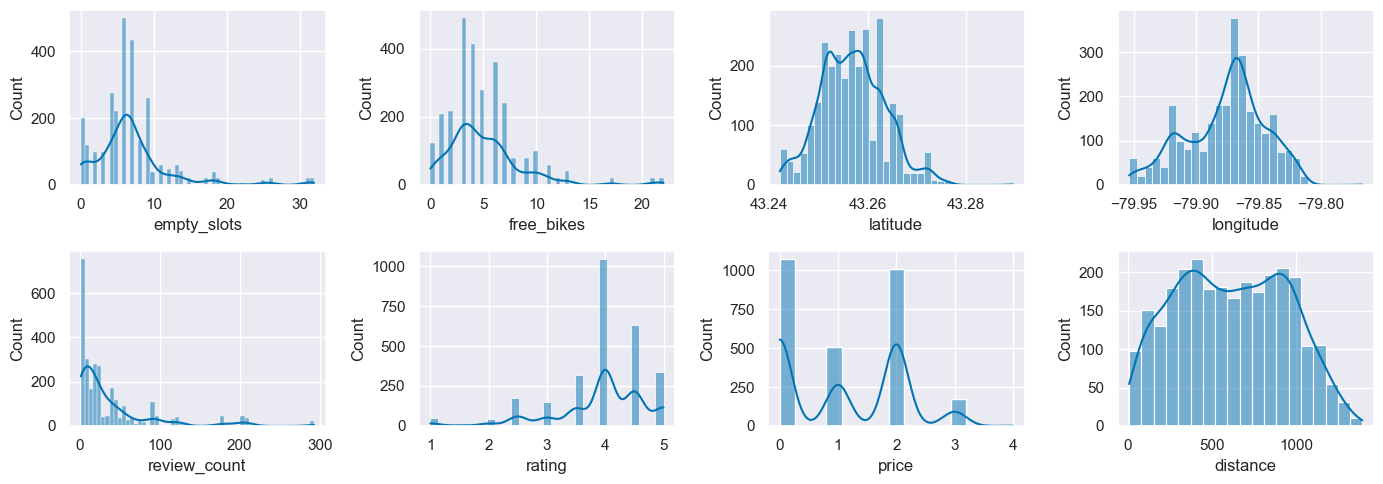

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(14, 5))

sns.histplot(ax=axes[0,0], data=full_df, x='empty_slots', kde=True)
sns.histplot(ax=axes[0,1], data=full_df, x='free_bikes', kde=True)
sns.histplot(ax=axes[0,2], data=full_df, x='latitude', kde=True)
sns.histplot(ax=axes[0,3], data=full_df, x='longitude', kde=True)
sns.histplot(ax=axes[1,0], data=full_df, x='review_count', kde=True)
sns.histplot(ax=axes[1,1], data=full_df, x='rating', kde=True)
sns.histplot(ax=axes[1,2], data=full_df, x='price', kde=True)
sns.histplot(ax=axes[1,3], data=full_df, x='distance', kde=True)

fig.tight_layout()

plt.show()

fig.savefig('../images/full_df_hist.svg')

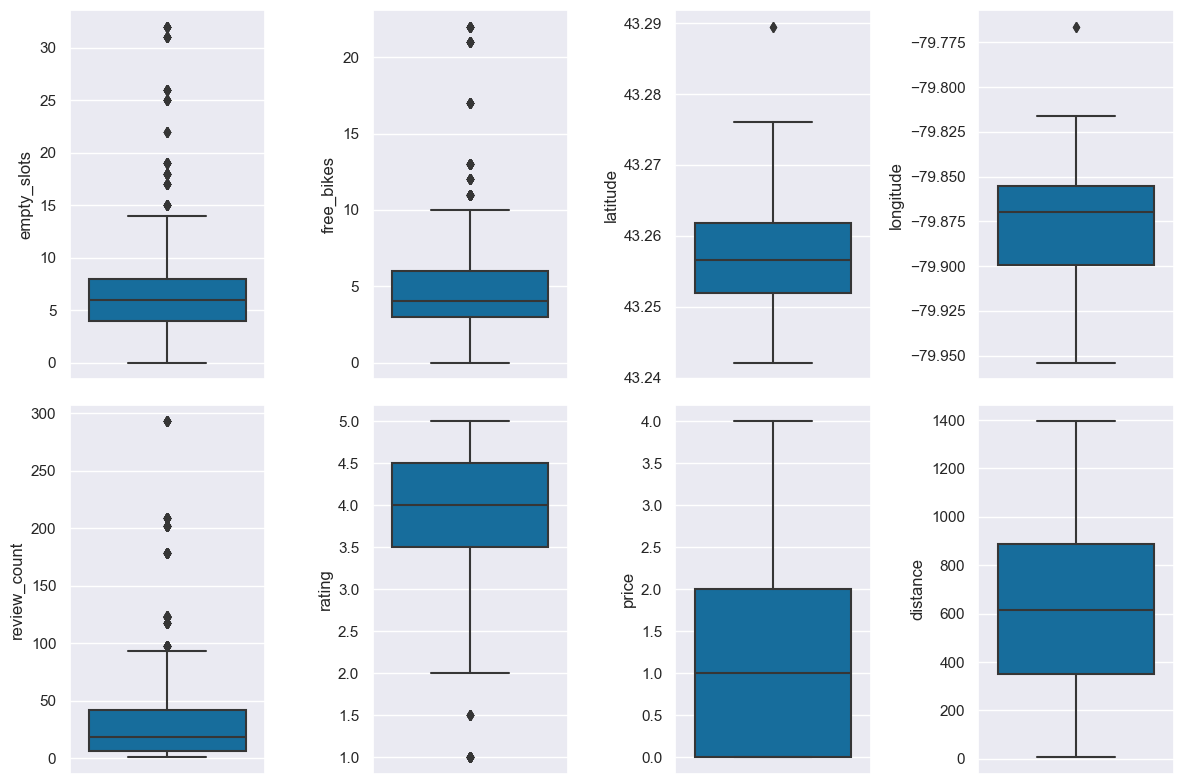

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))


sns.boxplot(ax=axes[0, 0], data=full_df, y='empty_slots')
sns.boxplot(ax=axes[0, 1], data=full_df, y='free_bikes')
sns.boxplot(ax=axes[0, 2], data=full_df, y='latitude')
sns.boxplot(ax=axes[0, 3], data=full_df, y='longitude')
sns.boxplot(ax=axes[1, 0], data=full_df, y='review_count')
sns.boxplot(ax=axes[1, 1], data=full_df, y='rating')
sns.boxplot(ax=axes[1, 2], data=full_df, y='price')
sns.boxplot(ax=axes[1, 3], data=full_df, y='distance')


plt.tight_layout()

plt.show()

fig.savefig('../images/full_df_boxplot.svg')

In [23]:
# Filter out the string columns to be able to use .corr()
full_df.select_dtypes(exclude=[object]).corr()

,empty_slots,free_bikes,latitude,longitude,review_count,rating,price,distance
empty_slots,1.000000,-0.250126,0.136379,-0.010498,-0.052826,-0.026366,-0.035891,0.091664
free_bikes,-0.250126,1.000000,0.084877,-0.233861,-0.022590,-0.040932,0.009747,-0.034115
latitude,0.136379,0.084877,1.000000,-0.356974,-0.008829,-0.075622,0.024089,-0.030470
longitude,-0.010498,-0.233861,-0.356974,1.000000,0.056650,0.188470,-0.001035,0.067966
review_count,-0.052826,-0.022590,-0.008829,0.056650,1.000000,-0.002689,0.517484,0.059094
rating,-0.026366,-0.040932,-0.075622,0.188470,-0.002689,1.000000,-0.116280,0.098876
price,-0.035891,0.009747,0.024089,-0.001035,0.517484,-0.116280,1.000000,0.042565
distance,0.091664,-0.034115,-0.030470,0.067966,0.059094,0.098876,0.042565,1.000000


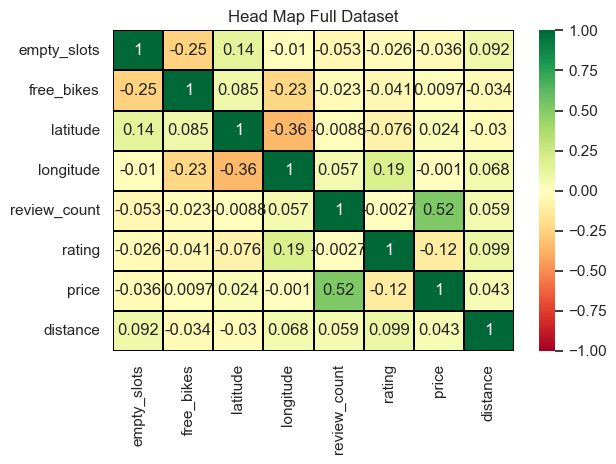

In [71]:
ax = sns.heatmap(full_df.select_dtypes(exclude=[object]).corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True, linewidth=.1, linecolor="black")
ax.set(title='Head Map Full Dataset')

plt.tight_layout()

plt.savefig('../images/full_df_heatmap.svg')
plt.show()

/Users/nickolasstello/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


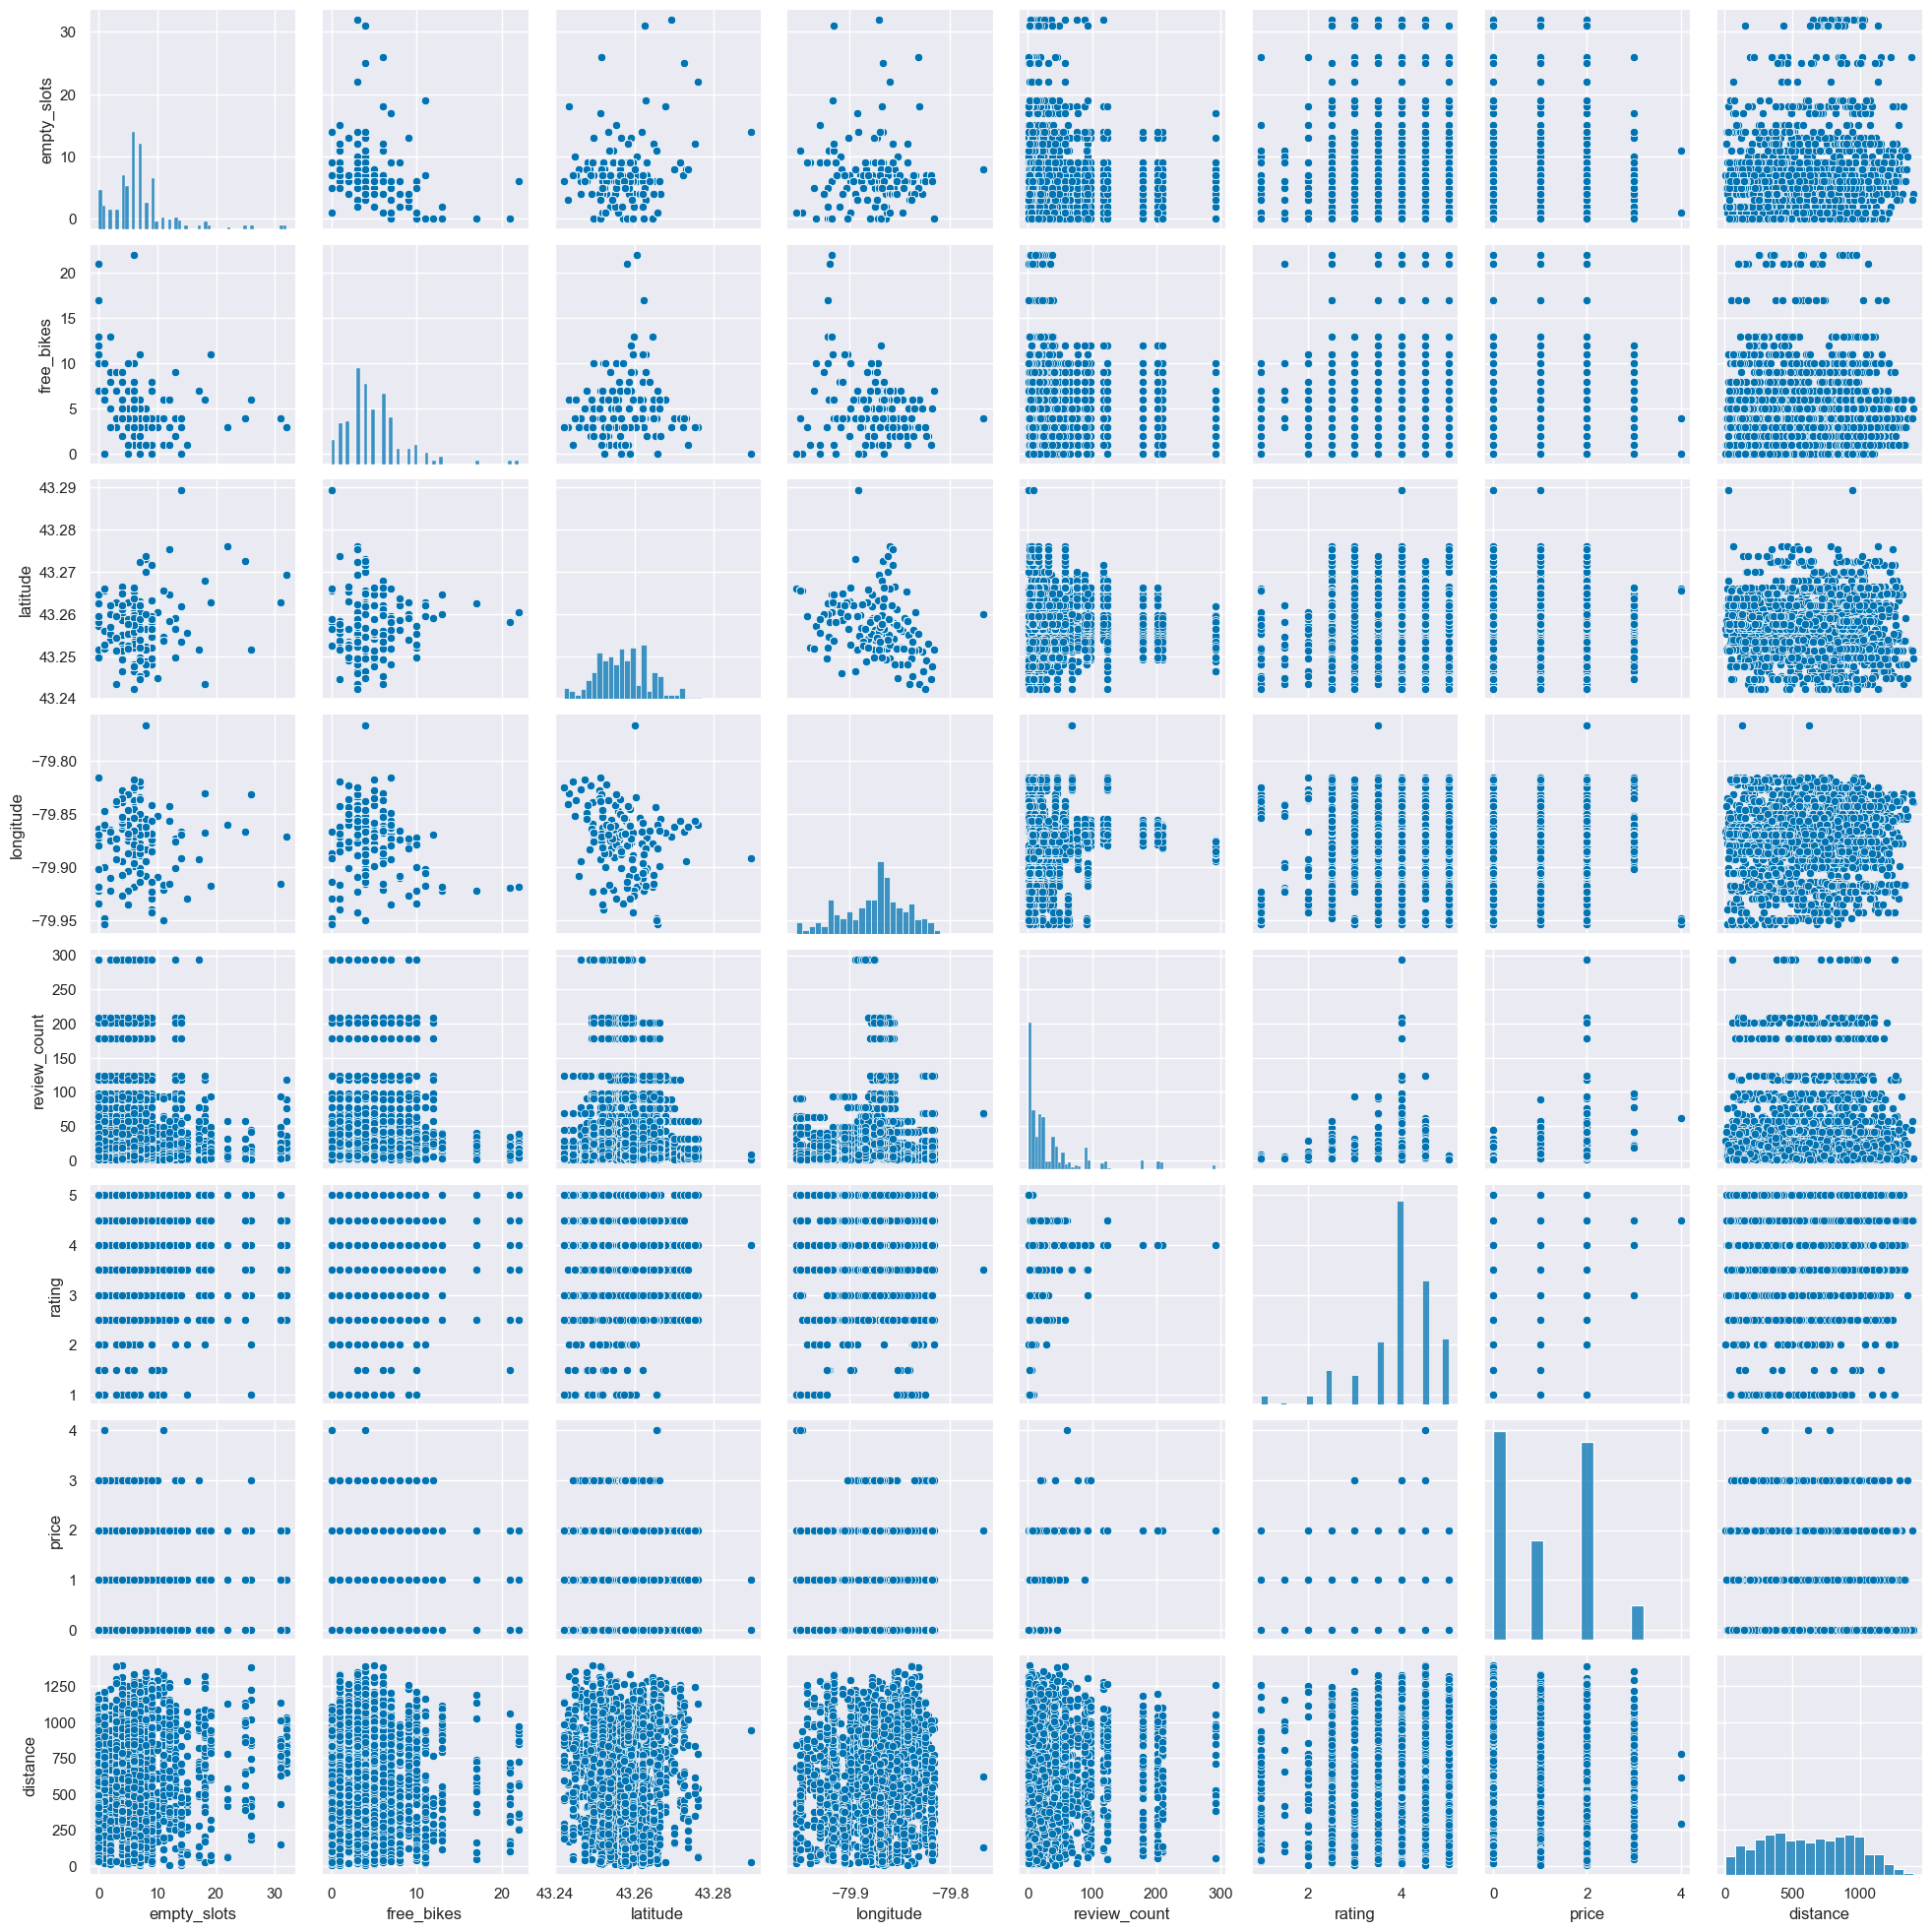

In [70]:
sns.pairplot(full_df)

plt.savefig('../images/full_df_pairgrid.svg')
plt.show()

I was unable to draw any conclusion from the graphs above using the full dataset. The variables do not seem to have any kind of correlation.

#### Data Visualization - Grouping by bike station

Trying to have a better picture by bike station, I grouped the original dataframe by station_id and used the mean of review_count rating price columns. The mean of empty_slots	and free_bikes is the actual number by bike station since each one has 20 poi each.

The goal is to identify if the number of free bikes is related somehow with the review_count, rating or	price.

In [26]:
grouped_by_staion = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()

In [27]:
grouped_by_staion

,empty_slots,free_bikes,review_count,rating,price
station_id,,,,,
024a3edf037cb411d16acc08a7fcb954,18.0,6.0,43.65,3.975,1.25
0265404843dccbf9378ce9d56a570914,8.0,1.0,72.60,3.950,1.80
05e87b8200ed015e7fb61865b83e3013,14.0,3.0,71.60,4.025,1.70
05fffdca01b4d886a823b025b6a04080,6.0,3.0,19.95,3.925,0.70
0688d3f9058eef55341330755b661c61,5.0,7.0,15.20,3.150,0.90
...,...,...,...,...,...
f144a0bfeea43251601ea8efa4b701d2,1.0,7.0,73.45,4.025,1.70
f21694c5cfd4706f5de302501e25eff7,1.0,10.0,10.35,3.750,0.70
f5019394e945492c7644ad38a0db33ce,6.0,10.0,83.20,4.150,1.55


In [28]:
grouped_by_staion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 024a3edf037cb411d16acc08a7fcb954 to fe1507c344d73062f43e013bdd6139a3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   145 non-null    float64
 1   free_bikes    145 non-null    float64
 2   review_count  143 non-null    float64
 3   rating        143 non-null    float64
 4   price         145 non-null    float64
dtypes: float64(5)
memory usage: 6.8+ KB


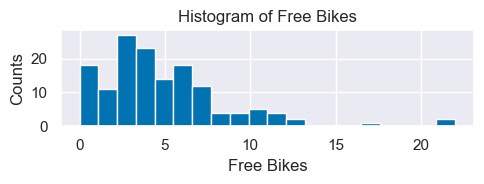

In [74]:
fig, ax = plt.subplots(figsize=(5,2))
ax.hist(grouped_by_staion['free_bikes'], bins=20)
ax.set_title('Histogram of Free Bikes')
ax.set_xlabel('Free Bikes')
ax.set_ylabel('Counts')

plt.tight_layout()

plt.savefig('../images/grouped_by_station_hist1.svg')

plt.show()

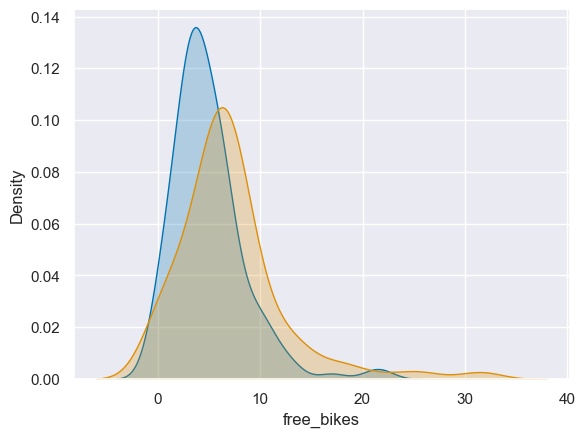

In [75]:
sns.kdeplot(data=grouped_by_staion, x='free_bikes', fill=True)
sns.kdeplot(data=grouped_by_staion, x='empty_slots', fill=True)

plt.savefig('../images/grouped_by_station_hist2.svg')

plt.show()

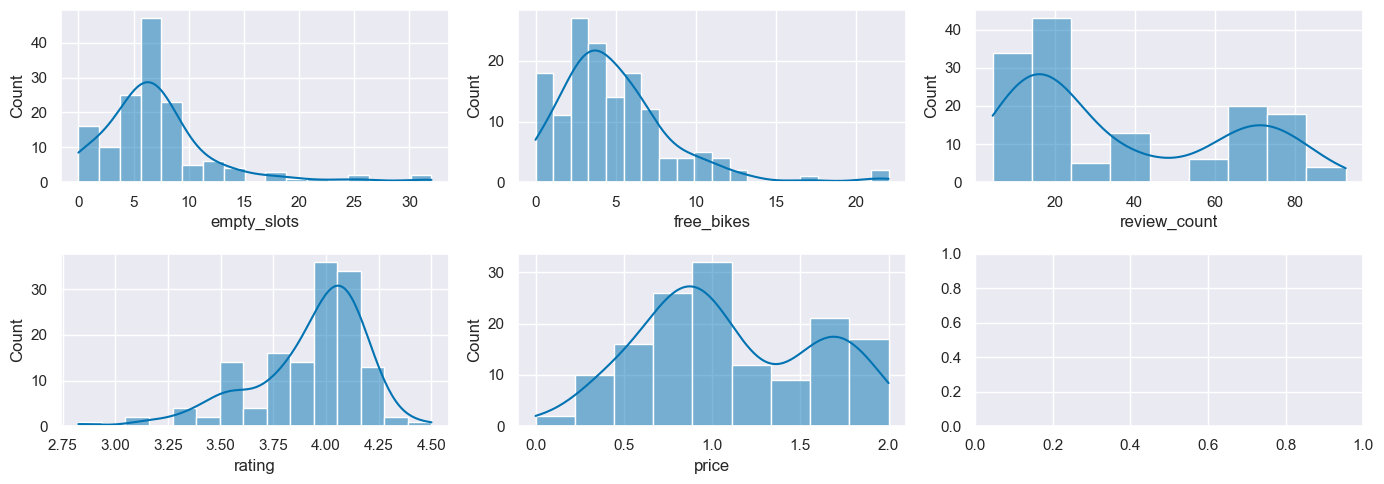

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(14, 5))

sns.histplot(ax=axes[0,0], data=grouped_by_staion, x='empty_slots', kde=True)
sns.histplot(ax=axes[0,1], data=grouped_by_staion, x='free_bikes', kde=True)
sns.histplot(ax=axes[0,2], data=grouped_by_staion, x='review_count', kde=True)
sns.histplot(ax=axes[1,0], data=grouped_by_staion, x='rating', kde=True)
sns.histplot(ax=axes[1,1], data=grouped_by_staion, x='price', kde=True)

fig.tight_layout()

plt.savefig('../images/grouped_by_station_hist0.svg')

plt.show()

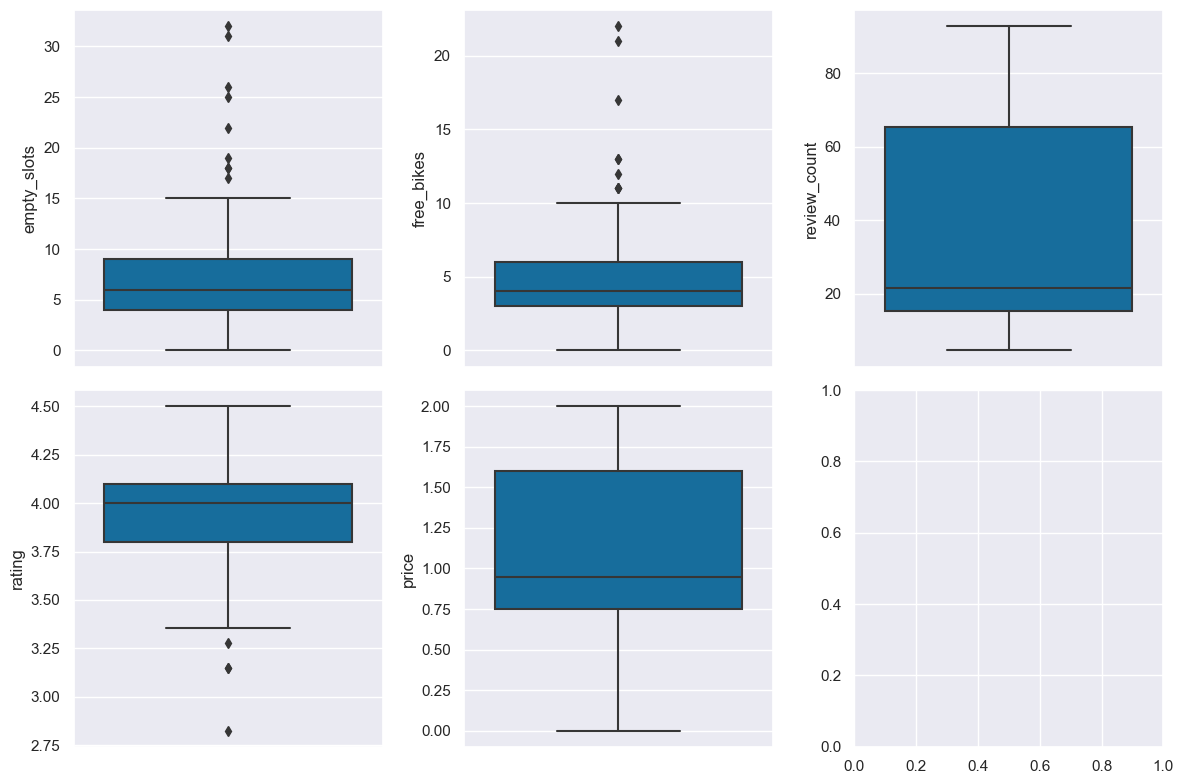

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))


sns.boxplot(ax=axes[0, 0], data=grouped_by_staion, y='empty_slots')
sns.boxplot(ax=axes[0, 1], data=grouped_by_staion, y='free_bikes')
sns.boxplot(ax=axes[0, 2], data=grouped_by_staion, y='review_count')
sns.boxplot(ax=axes[1, 0], data=grouped_by_staion, y='rating')
sns.boxplot(ax=axes[1, 1], data=grouped_by_staion, y='price')

plt.tight_layout()

plt.savefig('../images/grouped_by_station_boxplot.svg')

plt.show()

In [33]:
grouped_by_staion.corr()

,empty_slots,free_bikes,review_count,rating,price
empty_slots,1.000000,-0.262178,-0.121007,-0.118854,-0.084718
free_bikes,-0.262178,1.000000,-0.024361,-0.095557,0.041727
review_count,-0.121007,-0.024361,1.000000,0.378977,0.940001
rating,-0.118854,-0.095557,0.378977,1.000000,0.185908
price,-0.084718,0.041727,0.940001,0.185908,1.000000


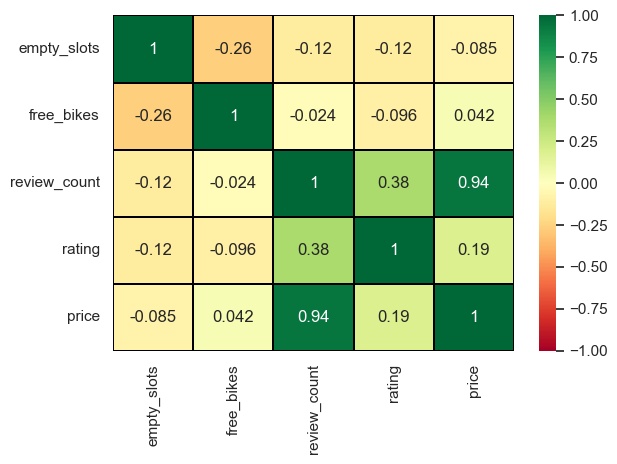

In [80]:
# plt.figure(figsize=(10, 80))
sns.heatmap(grouped_by_staion.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True, linewidth=.1, linecolor="black")

plt.tight_layout()

plt.savefig('../images/grouped_by_station_heatmap.svg')

plt.show()

/Users/nickolasstello/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


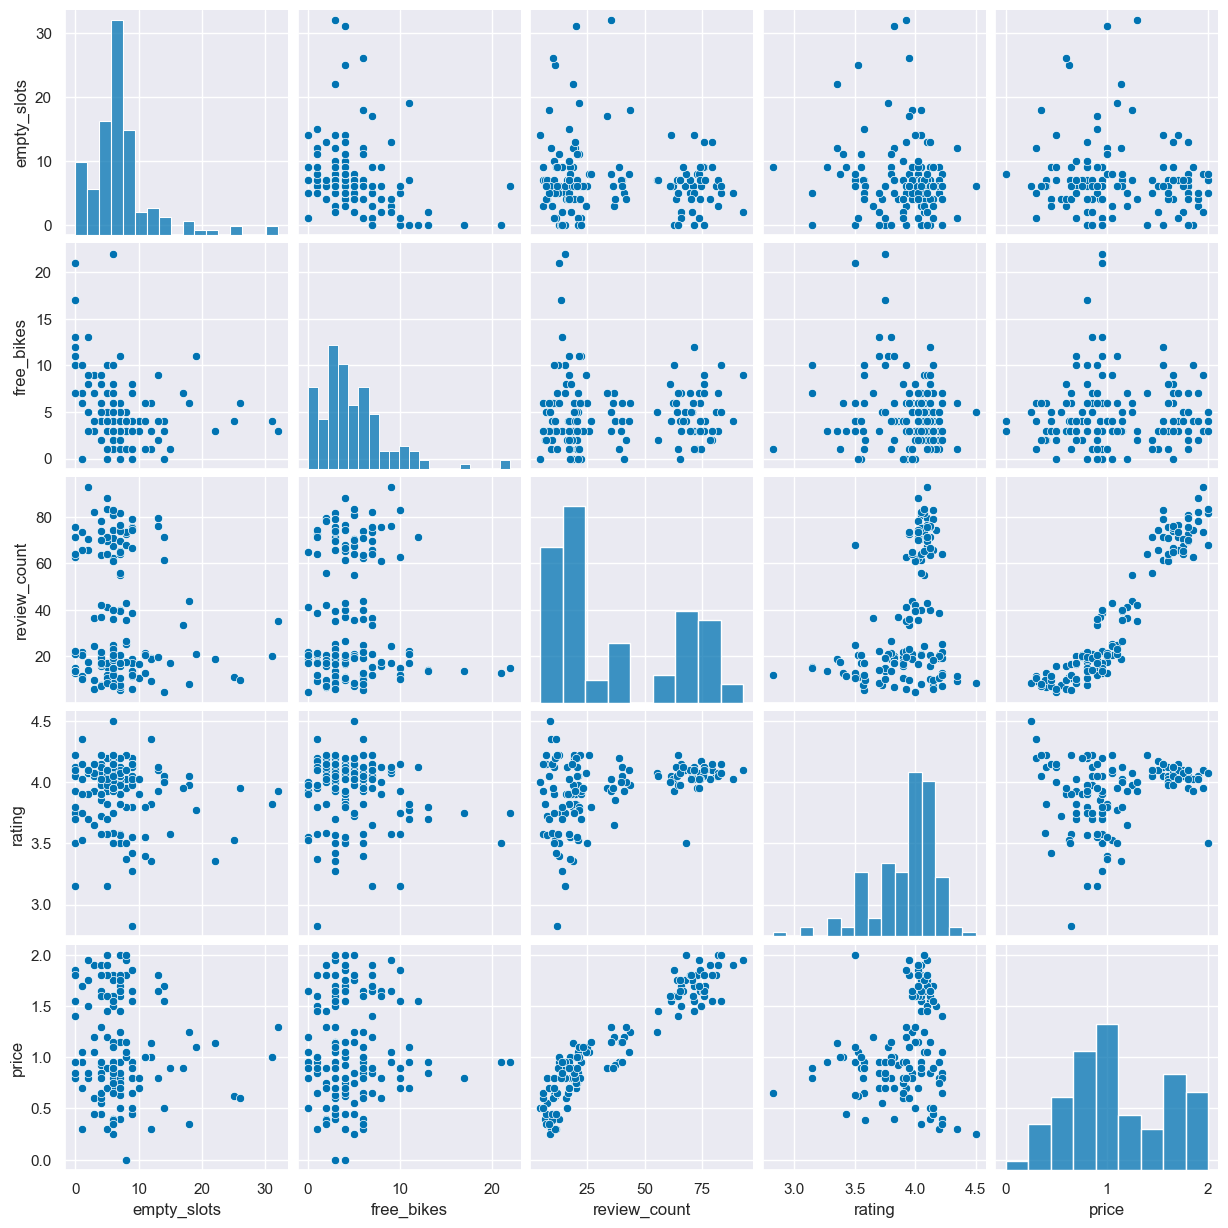

In [81]:
sns.pairplot(grouped_by_staion)

plt.savefig('../images/grouped_by_station_pairgrid.svg')

plt.show()

Even after grouping the data by station_id I was unable to draw any conclusion from the graphs above. Except for review_count x price, the variables do not seem to have any kind of correlation.

### Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)
___

#### Create Database
___

In [115]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [116]:
connection = create_connection("../data/hamilton_bikes.sqlite")

Connection to SQLite DB successful


#### Create Tables
___

In [117]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [131]:
bike_stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   empty_slots  145 non-null    int64  
 1   free_bikes   145 non-null    int64  
 2   station_id   145 non-null    object 
 3   latitude     145 non-null    float64
 4   longitude    145 non-null    float64
 5   name         145 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 7.9+ KB


In [132]:
create_bike_stations_table = """
CREATE TABLE IF NOT EXISTS bike_stations_hamilton (
  empty_slots INTEGER,
  free_bikes INTEGER,
  station_id TEXT NOT NULL PRIMARY KEY,
  latitude FLOAT,
  longitude FLOAT,
  name TEXT
);
"""

In [133]:
execute_query(connection, create_bike_stations_table)

Query executed successfully


In [134]:
yelp_poi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poi_id        2768 non-null   object 
 1   name          2768 non-null   object 
 2   review_count  2768 non-null   float64
 3   rating        2768 non-null   float64
 4   price         1700 non-null   object 
 5   distance      2768 non-null   float64
 6   full_address  2768 non-null   object 
 7   station_id    2768 non-null   object 
dtypes: float64(3), object(5)
memory usage: 194.6+ KB


In [135]:
create_yelp_poi_table = """
CREATE TABLE IF NOT EXISTS yelp_poi_hamilton (
  poi_id TEXT,
  name TEXT,
  review_count FLOAT,
  rating FLOAT,
  price TEXT,
  distance FLOAT,
  full_address TEXT,
  station_id TEXT,
  FOREIGN KEY (station_id) REFERENCES bike_stations_hamilton (station_id)
);
"""

In [136]:
execute_query(connection, create_yelp_poi_table)

Query executed successfully


#### Insert Records
___

In [137]:
bike_stations.to_sql('bike_stations_hamilton', connection, if_exists='replace')

145

In [138]:
yelp_poi.to_sql('yelp_poi_hamilton', connection, if_exists='replace')

2768

#### Select Records
___

In [139]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [140]:
select_stations = "SELECT * from bike_stations_hamilton limit 5"
bike_stations_table = execute_read_query(connection, select_stations)

for station in bike_stations_table:
    print(station)

(0, 9, 3, '45dbb0009135e465f49f054517cbe74d', 43.259125842121065, -79.87721174955368, 'Hess at king')
(1, 32, 3, 'cd881edad122a75c57d94b381cdfc6c0', 43.269288276229105, -79.87132698297499, 'Bayfront Park')
(2, 18, 6, '024a3edf037cb411d16acc08a7fcb954', 43.26785864558976, -79.8679232597351, 'Bay at Strachan')
(3, 9, 4, 'b933317ff2861c45aacbea4cbf4b541f', 43.263198441574474, -79.87180307507515, 'Bay at Mulberry')
(4, 9, 8, '20dc109608315db09a8332d6e6940c75', 43.2561324863605, -79.8744987564414, 'City Hall')


In [141]:
select_poi = "SELECT * from yelp_poi_hamilton limit 5"
yelp_poi_table = execute_read_query(connection, select_poi)

for poi in yelp_poi_table:
    print(poi)

(0, 'vqyK2q3zJ74TIT1-7Bf3Tg', 'La Luna', 65.0, 4.0, '$$', 108.42454951711392, "['306 King Street W', 'Hamilton, ON L8P 1B1', 'Canada']", '45dbb0009135e465f49f054517cbe74d')
(1, 'bHecMQ85o3ayw1t9hRA90g', 'The French', 98.0, 4.0, '$$$', 814.1051540640244, "['37 King William Street', 'Hamilton, ON L8R 1A1', 'Canada']", '45dbb0009135e465f49f054517cbe74d')
(2, 'Q4oLgsU62VPR28pBm0vCXw', 'Earth To Table : Bread Bar', 293.0, 4.0, '$$', 1052.1415211374524, "['258 Locke Street S', 'Hamilton, ON L8P 4B9', 'Canada']", '45dbb0009135e465f49f054517cbe74d')
(3, '9oIPWjU3DvtSdORv6I2toQ', 'The Ship', 209.0, 4.0, '$$', 970.855527645918, "['23 Augusta Street', 'Hamilton, ON L8N 1P6', 'Canada']", '45dbb0009135e465f49f054517cbe74d')
(4, '752Fv2jKafftvoS3Twkqyg', 'Hambrgr', 202.0, 4.0, '$$', 858.6720961059851, "['49 King William Street', 'Hamilton, ON L8R 1A2', 'Canada']", '45dbb0009135e465f49f054517cbe74d')


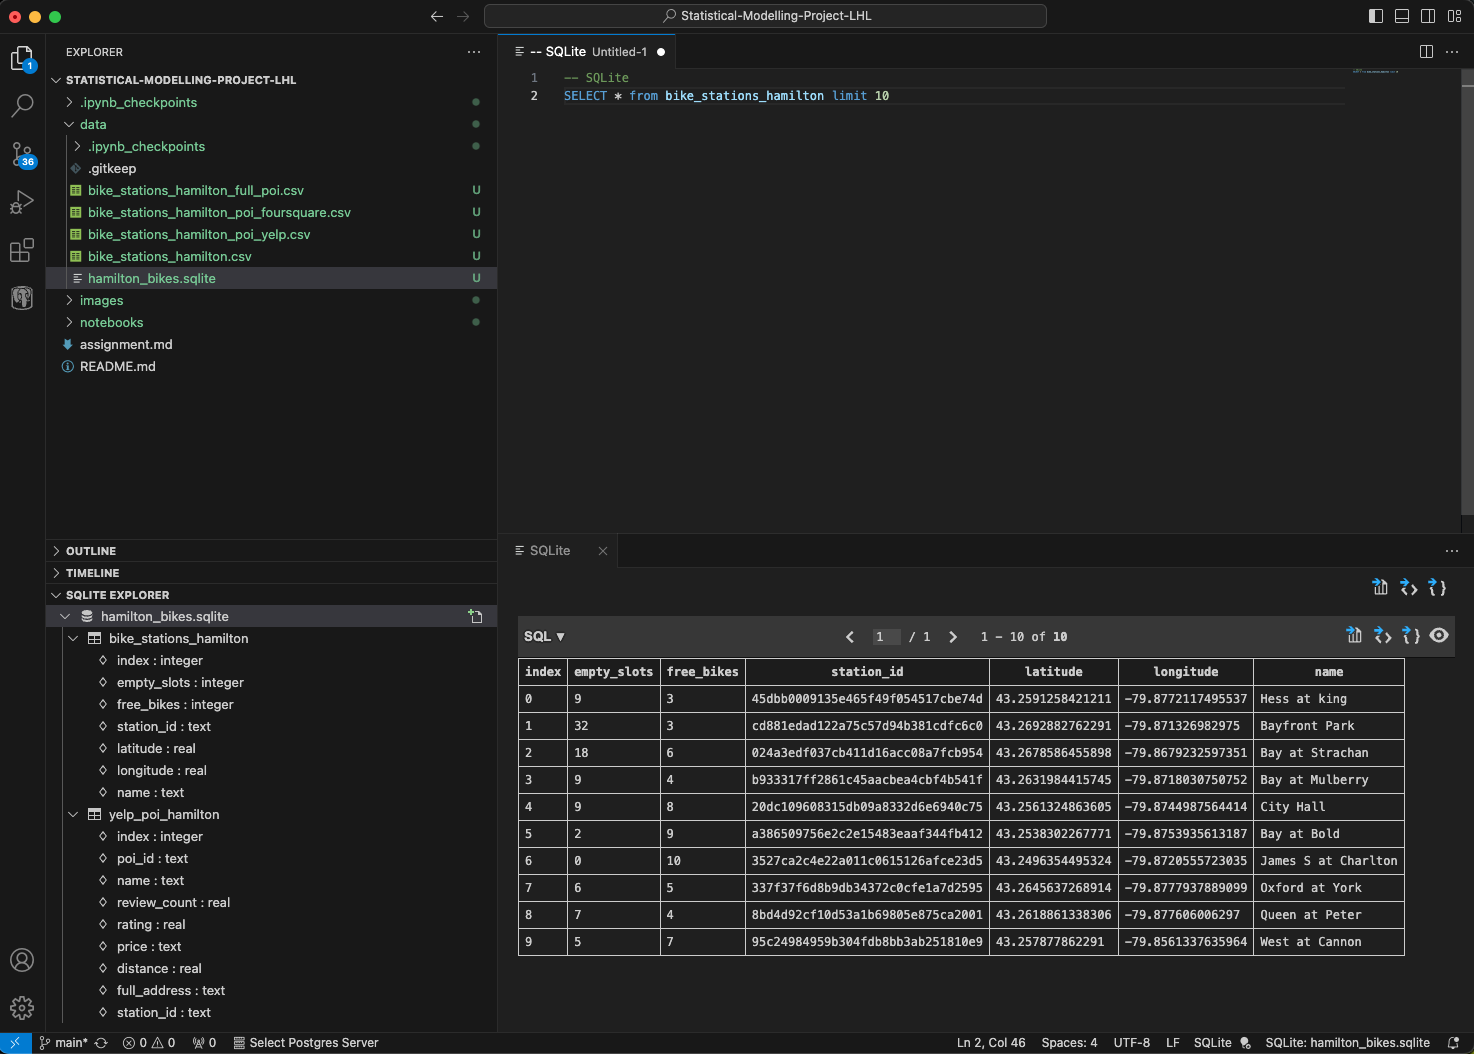

In [143]:
display.Image("../images/SQLite Database.png")

Look at the data before and after the join to validate your data.
___

In [82]:
# Checking if the merge worked correctly
print('Diff of number of bike stations:', bike_stations.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

Diff of number of bike stations: 0
Diff of number of POI: -2


As seen above, there are two extra rows on the dataframe after the merge when comparing the rows of yelp_poi dataframe. Further investigation is needed to identify the reason.

In [83]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   2770 non-null   int64  
 1   free_bikes    2770 non-null   int64  
 2   station_id    2770 non-null   object 
 3   latitude      2770 non-null   float64
 4   longitude     2770 non-null   float64
 5   station_name  2770 non-null   object 
 6   poi_id        2768 non-null   object 
 7   poi_name      2768 non-null   object 
 8   review_count  2768 non-null   float64
 9   rating        2768 non-null   float64
 10  price         2770 non-null   int8   
 11  distance      2768 non-null   float64
 12  full_address  2768 non-null   object 
dtypes: float64(5), int64(2), int8(1), object(5)
memory usage: 262.5+ KB


In [84]:
# Identify the points of interest that are null
full_df[full_df['poi_id'].isnull()]

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
560,8,3,4f4fb284d16149957dda0b5ea3fb8a61,43.246080,-79.908238,Chedoke Stairs,NaN,NaN,NaN,NaN,0,NaN,NaN
655,8,4,8601b4c3dfc470daf8d5e63b28b20e7f,43.272991,-79.894527,Princess Point,NaN,NaN,NaN,NaN,0,NaN,NaN


**It is concluded that the two new rows on full_df are for two bike stations without any point of interest (bars or restaurants) in a 1000-meter radius.**